# Import Labraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport


# Import Dataset

In [3]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Bengaluru_House_Data.csv")


In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


just explore about the features what are the meaning og it in this data set and how muuch they are contributing in it

In [5]:
a=ProfileReport(df)

In [6]:
a.to_widgets()

# Handling Missing Values

In [12]:
mis_values=df.isnull().sum().sort_values(ascending=False)


In [11]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [14]:
mean=df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
pd.concat([mis_values,mean*100],keys=['Missing_Vakues','Percentage'],axis=1)

,Missing_Vakues,Percentage
society,5502,41.306306
balcony,609,4.572072
bath,73,0.548048
size,16,0.120120
location,1,0.007508
price,0,0.000000
total_sqft,0,0.000000
availability,0,0.000000
area_type,0,0.000000


In [15]:
pd.Categorical(df['size'])

['2 BHK', '4 Bedroom', '3 BHK', '3 BHK', '2 BHK', ..., '5 Bedroom', '4 BHK', '2 BHK', '4 BHK', '1 BHK']
Length: 13320
Categories (31, object): ['1 BHK', '1 Bedroom', '1 RK', '10 BHK', ..., '8 BHK', '8 Bedroom', '9 BHK', '9 Bedroom']

In [16]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
18 Bedroom       1
14 BHK           1
43 Bedroom       1
12 Bedroom       1
19 BHK           1
13 BHK           1
16 BHK           1
27 BHK           1
Name: size, dtype: int64

In [17]:
import statsmodels.formula.api as smf

In [18]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [19]:
lrs=smf.ols(formula='price~total_sqft',data=df).fit()# ordinary least square
lrs.summary()#  p means Radio is contribution 100%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     16.47
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:18:04   Log-Likelihood:                -76135.
No. Observations:               13320   AIC:                         1.565e+05
Df Residuals:                   11203   BIC:                         1.724e+05
Df Model:                        2116                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         120.0000     80.112      1.498      0.134     -37.033     277.033
total_sqft[T.1.25Acres]            80.0000    113.295      0.706      0.480    -142.078     302.078
total_sqft[T.1.26Acres]             5.0000    113.295      0.044      0.965    -217.078     227.078
total_sqft[T.1000]                -55.3883     80.344     -0.689      0.491    -212.877     102.100
total_sqft[T.1000 - 1285]         -76.5850    113.295     -0.676      0.499    -298.663     145.493
total_sqft[T.10000]               861.2500     89.568      9.616      0.000     685.682    1036.818
total_sqft[T.1000Sq. Meter]       -27.0000    113.295     -0.238      0.812    -249.078     195.078
total_sqft[T.1001]                -88.4850     98.116     -0.902      0.367    -280.810     103.840
total_sqft[T.1002]                -79.9200     98.116     -0.815      0.415    -272.245     112.405
total_sqft[T.1003]                -78.2000     98.116     -0.797      0.425    -270.525     114.125
total_sqft[T.10030]                30.0000    113.295      0.265      0.791    -192.078     252.078
total_sqft[T.1004]                -71.0000    113.295     -0.627      0.531    -293.078     151.078
total_sqft[T.1004 - 1204]         -83.5700    113.295     -0.738      0.461    -305.648     138.508
total_sqft[T.1005]                -71.0492     83.136     -0.855      0.393    -234.010      91.911
total_sqft[T.1005.03 - 1252.49]   -72.5950    113.295     -0.641      0.522    -294.673     149.483
total_sqft[T.1006]                -74.6667     92.505     -0.807      0.420    -255.993     106.659
total_sqft[T.1007]                -62.0000     83.383     -0.744      0.457    -225.445     101.445
total_sqft[T.1008]                -42.6875     89.568     -0.477      0.634    -218.256     132.881
total_sqft[T.1009]                -70.8780     87.758     -0.808      0.419    -242.899     101.143
total_sqft[T.1010]                -70.8242     81.764     -0.866      0.386    -231.095      89.447
total_sqft[T.1010 - 1300]         -69.8750    113.295     -0.617      0.537    -291.953     152.203
total_sqft[T.1011]                -70.8233     92.505     -0.766      0.444    -252.149     110.503
total_sqft[T.1012]                -61.2078     82.307     -0.744      0.457    -222.544     100.128
total_sqft[T.1013]                -64.5000     98.116     -0.657      0.511    -256.825     127.825
total_sqft[T.1014]                -85.0000    113.295     -0.750      0.453    -307.078     137.078
total_sqft[T.1015]                -78.3295     81.997     -0.955      0.339    -239.058      82.399
total_sqft[T.1015 - 1540]         -63.2000    113.295     -0.558      0.577    -285.278     158.878
total_sqft[T.1016]                -74.3583     86.530     -0.859      0.390    -243

In [20]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [21]:
lrs=smf.ols(formula='price~bath',data=df).fit()# ordinary least square
lrs.summary()#  p means Radio is contribution 100%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     3484.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:19:27   Log-Likelihood:                -83543.
No. Observations:               13247   AIC:                         1.671e+05
Df Residuals:                   13245   BIC:                         1.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.1599      2.585     -9.348      0.000     -29.226     -19.094
bath          50.7119      0.859     59.024      0.000      49.028      52.396
==============================================================================
Omnibus:                    18988.154   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8780438.100
Skew:                           8.459   Prob(JB):                         0.00
Kurtosis:                     127.986   Cond. No.                         7.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lrs=smf.ols(formula='price~balcony',data=df).fit()# ordinary least square
lrs.summary()#  p means Radio is contribution 100%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           3.16e-42
Time:                        08:19:51   Log-Likelihood:                -79985.
No. Observations:               12711   AIC:                         1.600e+05
Df Residuals:                   12709   BIC:                         1.600e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.3161      2.531     29.758      0.000      70.355      80.277
balcony       19.4040      1.420     13.668      0.000      16.621      22.187
==============================================================================
Omnibus:                    17490.789   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6275755.867
Skew:                           7.893   Prob(JB):                         0.00
Kurtosis:                     110.705   Cond. No.                         4.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lrs=smf.ols(formula='price~bath+balcony',data=df).fit()# ordinary least square
lrs.summary()#  p means Radio is contribution 100%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1710.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:20:54   Log-Likelihood:                -78563.
No. Observations:               12711   AIC:                         1.571e+05
Df Residuals:                   12708   BIC:                         1.572e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.7340      2.919     -9.845      0.000     -34.455     -23.013
bath          48.8036      0.864     56.453      0.000      47.109      50.498
balcony        4.4546      1.297      3.435      0.001       1.913       6.997
==============================================================================
Omnibus:                    18379.135   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9829578.190
Skew:                           8.540   Prob(JB):                         0.00
Kurtosis:                     138.158   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Frequency/Count Encoding

In [29]:
frequency_dict=df['size'].value_counts().to_dict()

In [35]:
df['size']=df['size'].map(frequency_dict)

In [36]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,NaN,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,NaN,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,NaN,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,NaN,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,NaN,NaN,1200,2.0,1.0,51.00


In [37]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Bengaluru_House_Data.csv")


In [38]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Missing  Values Imputation

In [39]:
mean=df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
pd.concat([mis_values,mean*100],keys=['Missing_Vakues','Percentage'],axis=1)

,Missing_Vakues,Percentage
society,5502,41.306306
balcony,609,4.572072
bath,73,0.548048
size,16,0.120120
location,1,0.007508
price,0,0.000000
total_sqft,0,0.000000
availability,0,0.000000
area_type,0,0.000000


In [41]:
df['society'].dtype

dtype('O')

In [44]:
df['society']=df['society'].fillna(df['society'].mode(),inplace=True)

In [47]:
df.isnull().sum()

area_type           0
availability        0
location            1
size               16
society         13320
total_sqft          0
bath               73
balcony           609
price               0
dtype: int64

In [48]:
df.drop(columns='society',axis=1,inplace=True)

In [49]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [50]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [51]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [52]:
df['balcony']=df['balcony'].fillna(df['balcony'].mean())

In [53]:
df['balcony'].isnull().sum()

0

In [54]:
df['bath']=df['bath'].fillna(df['bath'].mean())

In [56]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [61]:
pd.Categorical(df['size'])

['2 BHK', '4 Bedroom', '3 BHK', '3 BHK', '2 BHK', ..., '5 Bedroom', '4 BHK', '2 BHK', '4 BHK', '1 BHK']
Length: 13320
Categories (31, object): ['1 BHK', '1 Bedroom', '1 RK', '10 BHK', ..., '8 BHK', '8 Bedroom', '9 BHK', '9 Bedroom']

In [62]:
df['size']=df['size'].fillna('2 BHK')

In [63]:
df['size'].isnull().sum()

0

In [64]:
pd.Categorical(df['location'])

['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', 'Lingadheeranahalli', 'Kothanur', ..., 'Whitefield', 'Richards Town', 'Raja Rajeshwari Nagar', 'Padmanabhanagar', 'Doddathoguru']
Length: 13320
Categories (1305, object): [' Anekal', ' Banaswadi', ' Basavangudi', ' Bhoganhalli', ..., 'tc.palya', 'vinayakanagar', 'white field,kadugodi', 'whitefiled']

In [65]:
df['location'].value_counts()

Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
4 Bedroom Farm House in Bagalur      1
Navodaya Nagar                       1
MEI layout, Bagalgunte               1
ITI Employees Layout                 1
1Channasandra                        1
Name: location, Length: 1305, dtype: int64

In [66]:
df['location']=df['location'].fillna('Whitefield')

In [67]:
df['location'].isnull().sum()

0

In [68]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [69]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [70]:
pd.Categorical(df['area_type'])

['Super built-up  Area', 'Plot  Area', 'Built-up  Area', 'Super built-up  Area', 'Super built-up  Area', ..., 'Built-up  Area', 'Super built-up  Area', 'Built-up  Area', 'Super built-up  Area', 'Super built-up  Area']
Length: 13320
Categories (4, object): ['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area']

In [71]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [76]:
pd.get_dummies(df['area_type'])

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
13315,0,1
13316,1,0
13317,0,1
13318,1,0


In [77]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,0,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,1,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,0,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,0,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [78]:
df['area_type']

0        0
1        0
2        1
3        0
4        0
        ..
13315    1
13316    0
13317    1
13318    0
13319    0
Name: area_type, Length: 13320, dtype: uint8

In [75]:
pd.Categorical(df['area_type'])

[0, 0, 1, 0, 0, ..., 1, 0, 1, 0, 0]
Length: 13320
Categories (2, uint64): [0, 1]

In [79]:
pd.Categorical(df['availability'])

['19-Dec', 'Ready To Move', 'Ready To Move', 'Ready To Move', 'Ready To Move', ..., 'Ready To Move', 'Ready To Move', 'Ready To Move', '18-Jun', 'Ready To Move']
Length: 13320
Categories (81, object): ['14-Jul', '14-Nov', '15-Aug', '15-Dec', ..., '22-May', '22-Nov', 'Immediate Possession', 'Ready To Move']

In [83]:
pd.get_dummies(df['availability'])

KeyError: 'availability'

In [84]:
df.head()

,14-Jul,14-Nov,15-Aug,15-Dec,15-Jun,15-Nov,15-Oct,16-Dec,16-Jan,16-Jul,16-Mar,16-Nov,16-Oct,16-Sep,17-Apr,17-Aug,17-Dec,17-Feb,17-Jan,17-Jul,17-Jun,17-Mar,17-May,17-Nov,17-Oct,17-Sep,18-Apr,18-Aug,18-Dec,18-Feb,18-Jan,18-Jul,18-Jun,18-Mar,18-May,18-Nov,18-Oct,18-Sep,19-Apr,19-Aug,19-Dec,19-Feb,19-Jan,19-Jul,19-Jun,19-Mar,19-May,19-Nov,19-Oct,19-Sep,20-Apr,20-Aug,20-Dec,20-Feb,20-Jan,20-Jul,20-Jun,20-Mar,20-May,20-Nov,20-Oct,20-Sep,21-Aug,21-Dec,21-Feb,21-Jan,21-Jul,21-Jun,21-Mar,21-May,21-Nov,21-Oct,21-Sep,22-Dec,22-Jan,22-Jun,22-Mar,22-May,22-Nov,Immediate Possession,Ready To Move
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [85]:
df.head()

,14-Jul,14-Nov,15-Aug,15-Dec,15-Jun,15-Nov,15-Oct,16-Dec,16-Jan,16-Jul,16-Mar,16-Nov,16-Oct,16-Sep,17-Apr,17-Aug,17-Dec,17-Feb,17-Jan,17-Jul,17-Jun,17-Mar,17-May,17-Nov,17-Oct,17-Sep,18-Apr,18-Aug,18-Dec,18-Feb,18-Jan,18-Jul,18-Jun,18-Mar,18-May,18-Nov,18-Oct,18-Sep,19-Apr,19-Aug,19-Dec,19-Feb,19-Jan,19-Jul,19-Jun,19-Mar,19-May,19-Nov,19-Oct,19-Sep,20-Apr,20-Aug,20-Dec,20-Feb,20-Jan,20-Jul,20-Jun,20-Mar,20-May,20-Nov,20-Oct,20-Sep,21-Aug,21-Dec,21-Feb,21-Jan,21-Jul,21-Jun,21-Mar,21-May,21-Nov,21-Oct,21-Sep,22-Dec,22-Jan,22-Jun,22-Mar,22-May,22-Nov,Immediate Possession,Ready To Move
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [88]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Bengaluru_House_Data.csv")


In [89]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


frequency / count encoding 

In [92]:
fre=df['size'].value_counts().to_dict()

In [93]:
df['size']=df['size'].map(fre)

In [95]:
df['size'].head()

0    5199.0
1     826.0
2    4310.0
3    4310.0
4    5199.0
Name: size, dtype: float64

In [96]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,5199.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,826.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,4310.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,4310.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,5199.0,NaN,1200,2.0,1.0,51.00


In [99]:
 area=pd.get_dummies(df['area_type'])

In [98]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,5199.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,826.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,4310.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,4310.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,5199.0,NaN,1200,2.0,1.0,51.00


In [101]:
type(area)

pandas.core.frame.DataFrame

In [104]:
df

,Built-up Area,Carpet Area,Plot Area,Super built-up Area,area_type,availability,balcony,bath,location,price,size,society,total_sqft
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Built-up Area,Carpet Area,Plot Area,Super built-up Area,area_type,availability,balcony,bath,location,price,size,society,total_sqft
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Bengaluru_House_Data.csv")


In [107]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [110]:
pd.Categorical(df['area_type'])

['Super built-up  Area', 'Plot  Area', 'Built-up  Area', 'Super built-up  Area', 'Super built-up  Area', ..., 'Built-up  Area', 'Super built-up  Area', 'Built-up  Area', 'Super built-up  Area', 'Super built-up  Area']
Length: 13320
Categories (4, object): ['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area']

In [111]:
df=pd.get_dummies(df,prefix=['size'],columns=['size'])

In [119]:
df.head()

AttributeError: head not found

In [113]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
ohc=OneHotEncoder()

In [120]:
df=ohc.fit_transform(df['availability'].values.reshape(-1,1),toarray)

IndexError: Index dimension must be <= 2

In [121]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Bengaluru_House_Data.csv")


In [122]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Label Encoding

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
lbe=LabelEncoder()


In [125]:
df['area_type']=lbe.fit_transform(df['area_type'])

In [126]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [127]:
pd.Categorical(df['area_type'])

[3, 2, 0, 3, 3, ..., 0, 3, 0, 3, 3]
Length: 13320
Categories (4, int64): [0, 1, 2, 3]

In [130]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [131]:
pd.Categorical(df['availability'])

['19-Dec', 'Ready To Move', 'Ready To Move', 'Ready To Move', 'Ready To Move', ..., 'Ready To Move', 'Ready To Move', 'Ready To Move', '18-Jun', 'Ready To Move']
Length: 13320
Categories (81, object): ['14-Jul', '14-Nov', '15-Aug', '15-Dec', ..., '22-May', '22-Nov', 'Immediate Possession', 'Ready To Move']

In [132]:
pd.Categorical(df['size'])

['2 BHK', '4 Bedroom', '3 BHK', '3 BHK', '2 BHK', ..., '5 Bedroom', '4 BHK', '2 BHK', '4 BHK', '1 BHK']
Length: 13320
Categories (31, object): ['1 BHK', '1 Bedroom', '1 RK', '10 BHK', ..., '8 BHK', '8 Bedroom', '9 BHK', '9 Bedroom']

In [134]:
df['size'].nunique()

31

In [135]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Bengaluru_House_Data.csv")


# Order Encoding

In [136]:
df['area_type'].nunique()

4

In [137]:
pd.Categorical(df['area_type'])

['Super built-up  Area', 'Plot  Area', 'Built-up  Area', 'Super built-up  Area', 'Super built-up  Area', ..., 'Built-up  Area', 'Super built-up  Area', 'Built-up  Area', 'Super built-up  Area', 'Super built-up  Area']
Length: 13320
Categories (4, object): ['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area']

In [138]:
area_dict={'Built-up  Area':1,'Carpet  Area':2,'Plot  Area':3,'Super built-up  Area':4}
df['area_type']=df['area_type'].map(area_dict)

In [139]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,3,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,1,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,4,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [141]:
print("I am Mujtaba Ali village Kumhariya")

I am Mujtaba Ali village Kumhariya


In [3]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Bengaluru_House_Data.csv")


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df['balcony'].isnull().sum()

609

<AxesSubplot:>

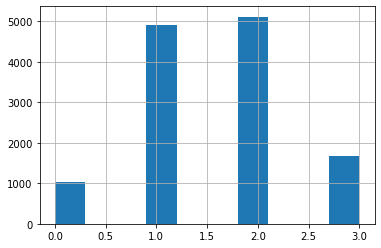

In [9]:
df['balcony']

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balcony', ylabel='Density'>

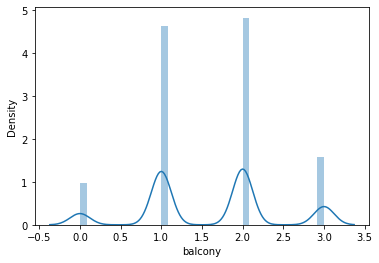

In [10]:
sns.distplot(df['balcony'])

In [12]:
a=ProfileReport(df)

In [13]:
a.to_widgets()

In [14]:
df['balcony']=df['balcony'].fillna(df['balcony'].mean())

In [15]:
df['balcony'].isnull().sum()

0

In [16]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [17]:
df['bath'].isnull().sum()

0

In [18]:
df['society'].isnull().sum()

5502

In [19]:
df['society']=df['society'].fillna(df['society'].mode())

In [20]:
df['society'].isnull().sum()

5502

In [22]:
import sklearn_pandas

ModuleNotFoundError: No module named 'sklearn_pandas'

In [21]:
from sklearn_pandas import CategoricalImputer

ModuleNotFoundError: No module named 'sklearn_pandas'

In [24]:
!pip install sklearn-pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\asus\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [26]:
import sklearn_pandas

ModuleNotFoundError: No module named 'sklearn_pandas'

In [25]:
from sklearn_pandas import CategoricalImputer

ModuleNotFoundError: No module named 'sklearn_pandas'

In [29]:
!pip install sklearn-pandas==0.0.3

In [30]:
from sklearn_pandas import CategoricalImputer

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\asus\anaconda3\lib\site-packages\sklearn\__init__.py)

In [35]:
df['society']=df['society'].fillna(df['society'].dropna().mode().values[0])

AttributeError: 'Series' object has no attribute 'value'

In [33]:
df['society'].isnull().sum()

5502

In [42]:
df['society'].dropna().mode().values[0]

'GrrvaGr'

In [37]:
pd.Categorical(df['society'])

['Coomee ', 'Theanmp', NaN, 'Soiewre', NaN, ..., 'ArsiaEx', NaN, 'Mahla T', 'SollyCl', NaN]
Length: 13320
Categories (2688, object): ['3Codeli', '7 ise P', 'A idse ', 'A rtsai', ..., 'Zostaa ', 'i1ncyRe', 'i1odsne', 'i1rtsCo']

In [47]:
df['society']=='GrrvaGr'

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: society, Length: 13320, dtype: bool

In [50]:
df['society']=df['society'].mode().values[0]

In [51]:
df['society'].isnull().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [54]:
df['size'].isnull().sum()

16

In [58]:
df['size']=df['size'].fillna(df['size'].mode().values[0])

In [55]:
df['size'].mode()

0    2 BHK
dtype: object

In [57]:
df['size'].mode().values[0]

'2 BHK'

In [59]:
df['size'].isnull().sum()

0

In [60]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")